# Model Training

### 1.1  Import Data and zRequired Packages

In [53]:
# Basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV,train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# from sklearn.
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
from sklearn.svm import SVR
import warnings


#### Import the CSV Data as Pandas Dataframe

In [2]:
df = pd.read_csv('../data/BikeDekho.csv')

In [3]:
df

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
0,Hero Honda,Passion Plus,2013,30000,Upto 100 cc,petrol,ahmedabad,First,40000
1,Hero,Motocorp Passion Pro Electric Start,2015,47500,Upto 100 cc,petrol,ahmedabad,First,30000
2,Hero,Motocorp Passion Pro Electric Start With Disc ...,2015,40000,Upto 100 cc,petrol,ahmedabad,First,30000
3,Hero,HF Deluxe Alloy Self Start,2017,30000,Upto 100 cc,petrol,ahmedabad,First,20000
4,TVS,XL100 Heavy Duty i Touch Start,2018,43000,Upto 100 cc,petrol,ahmedabad,First,30000
...,...,...,...,...,...,...,...,...,...
5737,Honda,CD 110 Dream Self Start,2018,14000,100 - 125 cc,petrol,yerraguntla,First,43500
5738,Hero,HF Deluxe Spoke Self Start,2015,40000,Upto 100 cc,petrol,zirakpur,First,36000
5739,Honda,Activa 125 Deluxe,2014,11000,100 - 125 cc,petrol,zirakpur,First,35000
5740,Bajaj,Pulsar 135LS 2018 STD,2012,22000,125 - 150 cc,petrol,zirakpur,Second,25000


In [4]:
df = df.sample(frac=1)

In [5]:
df

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
4113,Hero Honda,Glamour,2010,52674,100 - 125 cc,petrol,kanpur,First,15000
1922,Hero,Moto Corp Xtreme Disc,2012,81500,125 - 150 cc,petrol,kolkata,First,35000
4104,Bajaj,Pulsar AS 150,2015,35000,125 - 150 cc,petrol,kangra,First,50000
5475,Bajaj,Pulsar 220 F STD,2014,29000,200 - 250 cc,petrol,tirur,First,50000
3667,Bajaj,V15 Power Up STD,2016,20765,125 - 150 cc,petrol,guwahati,First,40000
...,...,...,...,...,...,...,...,...,...
2517,Royal Enfield,Classic 350 ABS,2014,6300,250 - 500 cc,petrol,pune,First,120000
5158,Hero,Maestro Edge ZX,2016,18000,100 - 125 cc,petrol,shikohabad,First,50000
1324,Honda,CBR 150 R Deluxe,2013,35000,125 - 150 cc,petrol,ghaziabad,First,55000
994,Bajaj,Pulsar 135LS 2018 STD,2014,30000,125 - 150 cc,petrol,delhi,First,25000


In [6]:
df.reset_index(drop=True, inplace=True)

### Preparing X and y variables

In [31]:
X = df.drop(columns=['price', 'model'], axis=1)
y = df['price']

In [32]:
X.head()

,company,year,kms_driven,cc_type,fuel_type,place,ownership
0,Hero Honda,2010,52674,100 - 125 cc,petrol,kanpur,First
1,Hero,2012,81500,125 - 150 cc,petrol,kolkata,First
2,Bajaj,2015,35000,125 - 150 cc,petrol,kangra,First
3,Bajaj,2014,29000,200 - 250 cc,petrol,tirur,First
4,Bajaj,2016,20765,125 - 150 cc,petrol,guwahati,First


In [33]:
y.head()

0    15000
1    35000
2    50000
3    50000
4    40000
Name: price, dtype: int64

In [34]:
num_features = [feature for feature in X.columns if X[feature].dtype!='O']
cat_features = [feature for feature in X.columns if X[feature].dtype=='O']
all_features = [feature for feature in X.columns]

In [35]:
all_features,cat_features,num_features

(['company',
  'year',
  'kms_driven',
  'cc_type',
  'fuel_type',
  'place',
  'ownership'],
 ['company', 'cc_type', 'fuel_type', 'place', 'ownership'],
 ['year', 'kms_driven'])

In [36]:
# create column Transformers  with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [37]:
preprocessor = ColumnTransformer(
    [
        ('TargetEncoder',ce.TargetEncoder(cols=['company', 'cc_type', 'place',]),['company', 'cc_type', 'place']),
        ('OneHotEncoder',OneHotEncoder(),['fuel_type','ownership']),
        ("StandardScaler",StandardScaler(),['kms_driven','year']),
    ]

)

In [38]:
preprocessor

ColumnTransformer(transformers=[('TargetEncoder',
                                 TargetEncoder(cols=['company', 'cc_type',
                                                     'place']),
                                 ['company', 'cc_type', 'place']),
                                ('OneHotEncoder', OneHotEncoder(),
                                 ['fuel_type', 'ownership']),
                                ('StandardScaler', StandardScaler(),
                                 ['kms_driven', 'year'])])

In [39]:
X=preprocessor.fit_transform(X, y)

In [40]:
X

array([[ 2.53447113e+04,  3.72880130e+04,  6.97419563e+04, ...,
         0.00000000e+00,  7.58865888e-01, -1.67973266e+00],
       [ 3.73609313e+04,  5.04970887e+04,  5.91614667e+04, ...,
         0.00000000e+00,  1.70200958e+00, -1.02990784e+00],
       [ 5.54709934e+04,  5.04970887e+04,  6.71495561e+04, ...,
         0.00000000e+00,  1.80598987e-01, -5.51706028e-02],
       ...,
       [ 4.52061787e+04,  5.04970887e+04,  5.45426679e+04, ...,
         0.00000000e+00,  1.80598987e-01, -7.04995426e-01],
       [ 5.54709934e+04,  5.04970887e+04,  7.31471777e+04, ...,
         0.00000000e+00,  1.70064500e-02, -3.80083014e-01],
       [ 4.97399360e+04,  6.85022496e+04,  9.36332789e+04, ...,
         0.00000000e+00,  7.36813614e-01, -7.04995426e-01]])

In [41]:
X.shape

(5742, 11)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((4593, 11), (4593,))

### Create an Evaluation Function to giev all metrics after model Training



In [43]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true,pred)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, pred)
    return mae, rmse, r2_square
    

In [44]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbours Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Ada Boost Regressor":AdaBoostRegressor(),
    "Logistic Regression":LogisticRegression(),
}

In [45]:
model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training set")
    print(" - Root Mean squared error : {:.4f}".format(model_train_rmse))
    print(" - Mean Absolute error : {:.4f}".format(model_train_mae))
    print(" - R2 squared error : {:.4f}".format(model_train_r2))
    print('-------------------------------------------------------------')
    print("Model Performance for Testing set")
    print(" - Root Mean squared error : {:.4f}".format(model_test_rmse))
    print(" - Mean Absolute error : {:.4f}".format(model_test_mae))
    print(" - R2 squared error : {:.4f}".format(model_test_r2))
    print("=============================================================",end='\n\n')
    r2_list.append(model_test_r2)
    

Linear Regression
Model Performance for Training set
 - Root Mean squared error : 67002.7949
 - Mean Absolute error : 22339.0899
 - R2 squared error : 0.4869
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 45881.2593
 - Mean Absolute error : 21068.1589
 - R2 squared error : 0.5910

Lasso
Model Performance for Training set
 - Root Mean squared error : 67002.8107
 - Mean Absolute error : 22337.9461
 - R2 squared error : 0.4869
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 45877.8578
 - Mean Absolute error : 21064.6922
 - R2 squared error : 0.5910

Ridge
Model Performance for Training set
 - Root Mean squared error : 67003.5401
 - Mean Absolute error : 22332.2681
 - R2 squared error : 0.4868
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 45861.4927
 - Mean Ab

/home/kishor/Coding/Commodity/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name', 'R2 Square']).sort_values(by=['R2 Square'], ascending=True)

,Model Name,R2 Square
6,Ada Boost Regressor,0.421799
7,Logistic Regression,0.463091
3,K-Neighbours Regressor,0.555193
4,Decision Tree,0.578317
0,Linear Regression,0.590952
1,Lasso,0.591013
2,Ridge,0.591305
5,Random Forest Regressor,0.731235


In [47]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name', 'R2 Square']).sort_values(by=['R2 Square'], ascending=True)

,Model Name,R2 Square
6,Ada Boost Regressor,0.421799
7,Logistic Regression,0.463091
3,K-Neighbours Regressor,0.555193
4,Decision Tree,0.578317
0,Linear Regression,0.590952
1,Lasso,0.591013
2,Ridge,0.591305
5,Random Forest Regressor,0.731235


In [59]:
lin_model = RandomForestRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 72.20


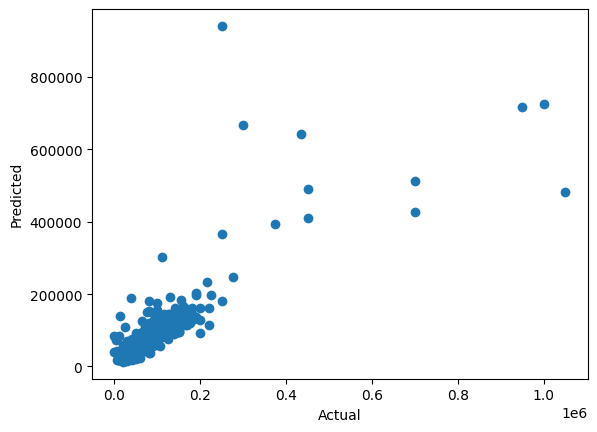

In [60]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

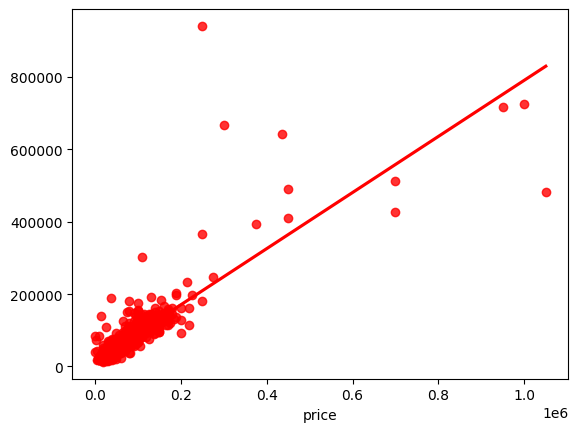

In [61]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [51]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
763,40000,24755.000000,15245.000000
2991,45000,50550.000000,-5550.000000
4631,35000,60945.000000,-25945.000000
3509,48000,52980.000000,-4980.000000
3384,25000,44233.540000,-19233.540000
...,...,...,...
3875,40000,35358.333333,4641.666667
677,35000,45959.970000,-10959.970000
1295,45000,47700.000000,-2700.000000
4327,120000,118949.950000,1050.050000


In [52]:
pred_df[:20]

,Actual Value,Predicted Value,Difference
763,40000,24755.000000,15245.000000
2991,45000,50550.000000,-5550.000000
4631,35000,60945.000000,-25945.000000
3509,48000,52980.000000,-4980.000000
3384,25000,44233.540000,-19233.540000
1586,32000,30330.000000,1670.000000
2437,110000,103649.850000,6350.150000
3094,40000,46370.000000,-6370.000000
199,28000,30735.000000,-2735.000000
2803,50000,48375.000000,1625.000000
